#### Introduction

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
import random
import warnings
warnings.filterwarnings('ignore')

### Generate A Sample Dataset

In [208]:
def generate_sample_dataset(n_samples, overlap, threshold):
    actual_values = ['positive' if random.random()>0.5 else 'negative' for x in range(n_samples)]
    predicted = ['positive' if x>threshold else 'negative' for x in calculated_values]
    
    df = pd.DataFrame({'sample_number': list(range(n_samples)),
                       'actual_label': actual_values})
    
    upper = int(50+100*overlap/2)
    lower = int(50-100*overlap/2)
    
    df['predicted_probability'] = [random.gauss(center1, sigma=10) if x=='negative' else random.gauss(center2, sigma=10) for x in df['actual_label']]
    df['predicted_label'] = ['positive' if x>threshold else 'negative' for x in df['predicted_probability']]
    
    return final

In [209]:
n_samples = 10000
overlap = 1
threshold = 0.6

In [210]:
final = generate_sample_dataset(n_samples, overlap, threshold)

In [211]:
final['predicted_label'].value_counts()

negative    5881
positive    4119
Name: predicted_label, dtype: int64

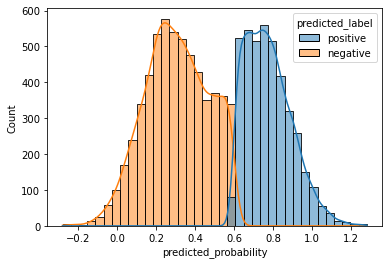

In [212]:
ax = sns.histplot(data=final, x="predicted_probability", hue='predicted_label', kde=True)

### Testing the Accuracy

- To test the accuracy, we can compare the `actual` with the `predicted` column.
- Remember that `True` has a value of `1` in Python. Thus using `mean` to get the accuracy is valid. 

In [13]:
accuracy = (test_df['actual'] == test_df['predicted']).mean() * 100
accuracy

77.0

- Our model is 90% accurate
- But that is an incomplete picture of the performance of our classifier
- That is where the confusingly named `confusion matrix` comes in
- Let us discuss each part

### Confusion Matrix

#### True Positive

- spams labelled acurately as spams

In [24]:
tp_classifier = (test_df['actual']=='spam') & (test_df['predicted']=='spam')
tp_classifier.sum()

30

In [25]:
tpr = tp_classifier.sum() / (test_df['actual']=='spam').sum()
tpr

0.8108108108108109

#### True Negative

- not spams labelled as such

In [26]:
tn_classifier = (test_df['actual']=='not_spam') & (test_df['predicted']=='not_spam')
tn_classifier.sum()

47

In [27]:
tnr = tn_classifier.sum() / (test_df['actual']=='not_spam').sum()
tnr

0.746031746031746

#### False Positive

- Not spams labelled as spams

In [28]:
fp_classifier = (test_df['actual']=='not_spam') & (test_df['predicted']=='spam')
fp_classifier.sum()

16

In [29]:
fpr = fp_classifier.sum() / (test_df['actual']=='spam').sum()
fpr

0.43243243243243246

#### False Negative

- Spams labelled as not spams

In [22]:
fn_classifier = (test_df['actual']=='spam') & (test_df['predicted']=='not_spam')
fn_classifier.sum()

7

In [23]:
fnr = fn_classifier.sum() / (test_df['predicted']=='not_spam').sum()
fnr

0.12962962962962962